# 워드 클라우드(단어구름) 실습
### amueller의 wordcloud package를 이용한 mask를 활용한 wordcloud 만들기! [참고](https://github.com/kimyoungjin06/wordcloud/blob/master/Make_the_Word_Cloud.ipynb)

## 1. Package import & font, mask, message setup!

- 이 코드는 mask를 다루는 부분, font를 다루는 부분, word를 다루는 부분으로 나뉜다. 먼저 필요한 패키지들을 불러오는데, numpy와 random, palettable은 font 색 설정할 때, PIL은 mask 이미지를 처리할 때, wordcloud는 이 모든 것을 이용해서 word cloud를 그릴 때 이용된다.

- 아래에서 딱히 어려운 점은 없고, color_func가 여기서는 Dark2_8이라는 palette를 이용해서 색을 만들어낸다. Palette를 바꾸고 싶다면 이 부분을 바꾸면 될 것!

- *PIL은 python3에서는 Pillow로 설치하고 PIL로 사용하면 된다.

- *mask로 쓸 이미지는 png파일로 우리가 단어를 배치할 공간만 그림이 존재해야 한다. 나머지 공간엔 흰색이 아니라 아예 이미지가 없는 png파일이 필요하다.

In [1]:
## 오류가 나면 모듈을 설치해야 합니다.
## 아마도 아래와 같은 모듈 오류가 있을 겁니다.
# wordcloud 오류, palettable 오류
# 아래 명령어를 복사해서 anaconda prompt에서 수행하세요.
# conda install -c conda-forge wordcloud
# pip install palettable\

import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# color_func 함수, Dark2_8이라는 pallette를 이용하여 색을 만들어냄.
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

# 한글 폰트 지정
font = "NanumPen"
font_path = "%s.ttf" % font

# 아이콘 지정
icon = "Korea" 
icon_path = "%s.png" % icon

### 데이터 입력

In [7]:
# 연설문1
# 아래 KoreaSummit_Moon.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("Park_apology1.txt", 'r', encoding='euc-kr')
Park_apology1 = f.read()
print(Park_apology1)
f.close()

존경하는 국민 여러분 최근 일부 언론 보도에 대해 국민 여러분께 제 입장을 진솔하게 말씀드리기 위해 이 자리에 섰습니다. 아시다시피 선거 때는 다양한 사람들의 의견을 많이 듣습니다. 최순실 씨는 과거 제가 어려움을 겪을 때 도와준 인연으로 지난 대선 때 주로 연설이나 홍보 등의 분야에서 저의 선거 운동이 국민들에게 어떻게 전달되는지에 대해 개인적인 의견이나 소감을 전달해 주는 역할을 하였습니다. 일부 연설문이나 홍보물도 같은 맥락에서 표현 등에서 도움을 받은 적이 있습니다. 취임 후에도 일정 기간 동안은 일부 자료들에 대해 의견을 들은 적도 있으나 청와대의 보좌 체계가 완비된 이후에는 그만두었습니다. 저로서는 좀 더 꼼꼼하게 챙겨 보고자 하는 순수한 마음으로 한 일인데 이유 여하를 막론하고 국민 여러분께 심려를 끼치고, 놀라고 마음 아프게 해 드린 점에 대해 송구스럽게 생각합니다. 국민 여러분께 깊이 사과드립니다.


In [8]:
# 연설문2
# 아래 speech.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("Park_apology2.txt", 'r', encoding='euc-kr')
Park_apology2 = f.read()
print(Park_apology2)
f.close()

존경하는 국민 여러분. 먼저 이번 최순실 씨 관련 사건으로 이루 말할 수 없는 큰 실망과 염려를 끼쳐 드린 점 다시 한번 진심으로 사과드립니다. 무엇보다 저를 믿고 국정을 맡겨 주신 국민 여러분께 돌이키기 힘든 마음의 상처를 드려서 너무나 가슴이 아픕니다. 저와 함께 헌신적으로 뛰어 주셨던 정부의 공직자들과 현장의 많은 분들, 그리고 선의의 도움을 주셨던 기업인 여러분께도 큰 실망을 드려 송구스럽게 생각합니다. 국가 경제와 국민의 삶에 도움이 될 것이라는 바람에서 추진된 일이었는데, 그 과정에서 특정 개인이 이권을 챙기고 여러 위법 행위까지 저질렀다고 하니 너무나 안타깝고 참담한 심정입니다. 이 모든 사태는 모두 저의 잘못이고 저의 불찰로 일어난 일입니다. 저의 큰 책임을 가슴 깊이 통감하고 있습니다. 어제 최순실 씨가 중대한 범죄 혐의로 구속됐고, 안종범 전 정책 조정 수석이 체포돼 조사를 받는 등 검찰 특별 수사본부에서 철저하고 신속하게 수사를 진행하고 있습니다. 앞으로 검찰은 어떠한 것에도 구애받지 말고 명명백백하게 진실을 밝히고 이를 토대로 엄정한 사법처리가 이뤄져야 할 것입니다. 저는 이번 일의 진상과 책임을 규명하는 데 있어서 최대한 협조하겠습니다. 이미 청와대 비서실과 경호실에도 검찰의 수사에 적극 협조하도록 지시했습니다. 필요하다면 저 역시 검찰의 조사에 성실하게 임할 각오이며 특별 검사에 의한 수사까지도 수용하겠습니다. 국민 여러분. 저는 청와대에 들어온 이후 혹여 불미스러운 일이 생기지는 않을까 염려하여 가족 간의 교류마저 끊고 외롭게 지내왔습니다. 홀로 살면서 챙겨야 할 여러 개인사들을 도와줄 사람조차 마땅치 않아서 오랜 인연을 갖고 있었던 최순실 씨로부터 도움을 받게 되었고, 왕래하게 되었습니다. 제가 가장 힘들었던 시절에 곁을 지켜줬기 때문에, 저 스스로 경계의 담장을 낮췄던 것이 사실입니다. 돌이켜보니 개인적 인연을 믿고 제대로 살피지 못한 나머지 주변 사람들에게 엄격하지 못한 결과가 되고 말았습니다. 저 스스로를 용서하기 어렵고, 서

In [9]:
# 연설문3
# 아래 speech.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("Park_apology3.txt", 'r', encoding='euc-kr')
Park_apology3 = f.read()
print(Park_apology3)
f.close()

존경하는 국민 여러분, 저의 불찰로 국민 여러분께 큰 심려를 끼쳐드린 점 다시 한번 깊이 사죄드립니다. 이번 일로 마음 아파하시는 국민 여러분의 모습을 뵈면서 저 자신 백번이라도 사과를 드리는 것이 당연한 도리라고 생각하고 있습니다. 하지만 그런다 해도 그 큰 실망과 분노를 다 풀어드릴 수 없다는 생각에 이르면 제 가슴이 더욱 무너져 내립니다. 국민 여러분, 돌이켜 보면 지난 18년 동안 국민 여러분과 함께 했던 여정은 더 없이 고맙고 소중한 시간이었습니다. 저는 1998년 처음 정치를 시작했을 때부터 대통령에 취임하여 오늘 이 순간에 이르기까지 오로지 국가와 국민을 위하는 마음으로 모든 노력을 다해 왔습니다. 단 한순간도 저의 사익을 추구하지 않았고 작은 사심도 품지 않고 살아왔습니다. 지금 벌어진 여러 문제들 역시 저로서는 국가를 위한 공적인 사업이라고 믿고 추진했던 일들이었고 그 과정에서 어떠한 개인적 이익도 취하지 않았습니다. 하지만 주변을 제대로 관리하지 못한 것은 결국 저의 큰 잘못입니다. 이번 사건에 대한 경위는 가까운 시일 안에 소상히 말씀을 드리겠습니다. 국민 여러분, 그동안 저는 국내외 여건이 어려워지고 있는 상황에서 나라와 국민을 위해 어떻게 하는 것이 옳은 길인지 숱한 밤을 지새우며 고민하고 또 고민하였습니다. 이제 저는 이 자리에서 저의 결심을 밝히고자 합니다. 저는 제 대통령직 임기 단축을 포함한 진퇴 문제를 국회의 결정에 맡기겠습니다. 여야 정치권이 논의하여 국정의 혼란과 공백을 최소화하고 안정되게 정권을 이양할 수 있는 방안을 만들어 주시면 그 일정과 법 절차에 따라 대통령직에서 물러나겠습니다. 저는 이제 모든 것을 내려놓았습니다. 하루 속히 대한민국이 혼란에서 벗어나 본래의 궤도로 돌아가기를 바라는 마음뿐입니다. 다시 한번 국민 여러분께 죄송하다는 말씀을 드리며 대한민국의 희망찬 미래를 위해 정치권에서도 지혜를 모아주실 것을 호소드립니다. 여러 가지 오늘은 무거운 말씀을 드렸기 때문에 여기도 말씀드렸듯이, 가까운 시일 안에 여러 

## 2. Load the mask, font coloring, generate word cloud!
- 먼저 icon에 image를 불러오고, mask를 RGB type으로 icon과 같은 사이즈로 전부 (255,255,255)값 (아마 흰색?)으로 만들어내고, 이 (255,255,255)가 이미지가 채워지지 않는 부분을 의미한다. (?Image.new를 참고!), 그리고 나서 이 mask에 아까 불러온 icon의 형상을 붙여넣는다. 그리고 나서 이를 nparray로 만든다.

- 이제 만들어놓은 mask와 불러놨던 font를 이용하여 WordCloud함수를 이용해 wordcloud를 만들어내고, WordCloud.recolor를 이용해서 아까 만들어놓은 color_func()를 사용해 불러온 palette를 이용해 색을 입힌다. 그리고 저장하면 끝!



# 남북정상회담 두 정상의 대화문 워드 클라우드
[연설문 시각화](https://github.com/eventia/CandSpeech/blob/master/wordcloud.py)

In [10]:
# 연설문 1번 전처리
Park_apology1 = Park_apology1.split('\n\n')
Park_apology1

['존경하는 국민 여러분 최근 일부 언론 보도에 대해 국민 여러분께 제 입장을 진솔하게 말씀드리기 위해 이 자리에 섰습니다. 아시다시피 선거 때는 다양한 사람들의 의견을 많이 듣습니다. 최순실 씨는 과거 제가 어려움을 겪을 때 도와준 인연으로 지난 대선 때 주로 연설이나 홍보 등의 분야에서 저의 선거 운동이 국민들에게 어떻게 전달되는지에 대해 개인적인 의견이나 소감을 전달해 주는 역할을 하였습니다. 일부 연설문이나 홍보물도 같은 맥락에서 표현 등에서 도움을 받은 적이 있습니다. 취임 후에도 일정 기간 동안은 일부 자료들에 대해 의견을 들은 적도 있으나 청와대의 보좌 체계가 완비된 이후에는 그만두었습니다. 저로서는 좀 더 꼼꼼하게 챙겨 보고자 하는 순수한 마음으로 한 일인데 이유 여하를 막론하고 국민 여러분께 심려를 끼치고, 놀라고 마음 아프게 해 드린 점에 대해 송구스럽게 생각합니다. 국민 여러분께 깊이 사과드립니다.']

In [11]:
# 연설문 2번 전처리
Park_apology2 = Park_apology2.split('\n\n')
Park_apology2

['존경하는 국민 여러분. 먼저 이번 최순실 씨 관련 사건으로 이루 말할 수 없는 큰 실망과 염려를 끼쳐 드린 점 다시 한번 진심으로 사과드립니다. 무엇보다 저를 믿고 국정을 맡겨 주신 국민 여러분께 돌이키기 힘든 마음의 상처를 드려서 너무나 가슴이 아픕니다. 저와 함께 헌신적으로 뛰어 주셨던 정부의 공직자들과 현장의 많은 분들, 그리고 선의의 도움을 주셨던 기업인 여러분께도 큰 실망을 드려 송구스럽게 생각합니다. 국가 경제와 국민의 삶에 도움이 될 것이라는 바람에서 추진된 일이었는데, 그 과정에서 특정 개인이 이권을 챙기고 여러 위법 행위까지 저질렀다고 하니 너무나 안타깝고 참담한 심정입니다. 이 모든 사태는 모두 저의 잘못이고 저의 불찰로 일어난 일입니다. 저의 큰 책임을 가슴 깊이 통감하고 있습니다. 어제 최순실 씨가 중대한 범죄 혐의로 구속됐고, 안종범 전 정책 조정 수석이 체포돼 조사를 받는 등 검찰 특별 수사본부에서 철저하고 신속하게 수사를 진행하고 있습니다. 앞으로 검찰은 어떠한 것에도 구애받지 말고 명명백백하게 진실을 밝히고 이를 토대로 엄정한 사법처리가 이뤄져야 할 것입니다. 저는 이번 일의 진상과 책임을 규명하는 데 있어서 최대한 협조하겠습니다. 이미 청와대 비서실과 경호실에도 검찰의 수사에 적극 협조하도록 지시했습니다. 필요하다면 저 역시 검찰의 조사에 성실하게 임할 각오이며 특별 검사에 의한 수사까지도 수용하겠습니다. 국민 여러분. 저는 청와대에 들어온 이후 혹여 불미스러운 일이 생기지는 않을까 염려하여 가족 간의 교류마저 끊고 외롭게 지내왔습니다. 홀로 살면서 챙겨야 할 여러 개인사들을 도와줄 사람조차 마땅치 않아서 오랜 인연을 갖고 있었던 최순실 씨로부터 도움을 받게 되었고, 왕래하게 되었습니다. 제가 가장 힘들었던 시절에 곁을 지켜줬기 때문에, 저 스스로 경계의 담장을 낮췄던 것이 사실입니다. 돌이켜보니 개인적 인연을 믿고 제대로 살피지 못한 나머지 주변 사람들에게 엄격하지 못한 결과가 되고 말았습니다. 저 스스로를 용서하기 어렵고,

In [12]:
# 연설문 3번 전처리
Park_apology3 = Park_apology3.split('\n\n')
Park_apology3

['존경하는 국민 여러분, 저의 불찰로 국민 여러분께 큰 심려를 끼쳐드린 점 다시 한번 깊이 사죄드립니다. 이번 일로 마음 아파하시는 국민 여러분의 모습을 뵈면서 저 자신 백번이라도 사과를 드리는 것이 당연한 도리라고 생각하고 있습니다. 하지만 그런다 해도 그 큰 실망과 분노를 다 풀어드릴 수 없다는 생각에 이르면 제 가슴이 더욱 무너져 내립니다. 국민 여러분, 돌이켜 보면 지난 18년 동안 국민 여러분과 함께 했던 여정은 더 없이 고맙고 소중한 시간이었습니다. 저는 1998년 처음 정치를 시작했을 때부터 대통령에 취임하여 오늘 이 순간에 이르기까지 오로지 국가와 국민을 위하는 마음으로 모든 노력을 다해 왔습니다. 단 한순간도 저의 사익을 추구하지 않았고 작은 사심도 품지 않고 살아왔습니다. 지금 벌어진 여러 문제들 역시 저로서는 국가를 위한 공적인 사업이라고 믿고 추진했던 일들이었고 그 과정에서 어떠한 개인적 이익도 취하지 않았습니다. 하지만 주변을 제대로 관리하지 못한 것은 결국 저의 큰 잘못입니다. 이번 사건에 대한 경위는 가까운 시일 안에 소상히 말씀을 드리겠습니다. 국민 여러분, 그동안 저는 국내외 여건이 어려워지고 있는 상황에서 나라와 국민을 위해 어떻게 하는 것이 옳은 길인지 숱한 밤을 지새우며 고민하고 또 고민하였습니다. 이제 저는 이 자리에서 저의 결심을 밝히고자 합니다. 저는 제 대통령직 임기 단축을 포함한 진퇴 문제를 국회의 결정에 맡기겠습니다. 여야 정치권이 논의하여 국정의 혼란과 공백을 최소화하고 안정되게 정권을 이양할 수 있는 방안을 만들어 주시면 그 일정과 법 절차에 따라 대통령직에서 물러나겠습니다. 저는 이제 모든 것을 내려놓았습니다. 하루 속히 대한민국이 혼란에서 벗어나 본래의 궤도로 돌아가기를 바라는 마음뿐입니다. 다시 한번 국민 여러분께 죄송하다는 말씀을 드리며 대한민국의 희망찬 미래를 위해 정치권에서도 지혜를 모아주실 것을 호소드립니다. 여러 가지 오늘은 무거운 말씀을 드렸기 때문에 여기도 말씀드렸듯이, 가까운 시일 안에 여

In [14]:
# 연설문 1번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus1 = tf_vectorizer.fit(Park_apology1)
tf_bow1 = tf_vectorizer.fit_transform(Park_apology1)
tf_bow1

<1x97 sparse matrix of type '<class 'numpy.int64'>'
	with 97 stored elements in Compressed Sparse Row format>

In [15]:
# 연설문 2번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus2 = tf_vectorizer.fit(Park_apology2)
tf_bow2 = tf_vectorizer.fit_transform(Park_apology2)
tf_bow2

<1x400 sparse matrix of type '<class 'numpy.int64'>'
	with 400 stored elements in Compressed Sparse Row format>

In [16]:
# 연설문 3번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus3 = tf_vectorizer.fit(Park_apology3)
tf_bow3 = tf_vectorizer.fit_transform(Park_apology3)
tf_bow3

<1x206 sparse matrix of type '<class 'numpy.int64'>'
	with 206 stored elements in Compressed Sparse Row format>

In [17]:
# 연설문 1 
# check vocabulary in TDM
print(len(tf_corpus1.vocabulary_))
print(len(tf_corpus1.get_feature_names()))
tf_vectorizer.get_feature_names()

97
97


['18년',
 '1998년',
 '가까운',
 '가슴이',
 '가지',
 '개인적',
 '것도',
 '것은',
 '것을',
 '것이',
 '결국',
 '결심을',
 '결정에',
 '경위는',
 '경위에',
 '고맙고',
 '고민하고',
 '고민하였습니다',
 '공백을',
 '공적인',
 '과정에서',
 '관리하지',
 '국가를',
 '국가와',
 '국내외',
 '국민',
 '국민을',
 '국정의',
 '국회의',
 '궤도로',
 '그동안',
 '그때',
 '그런다',
 '길인지',
 '깊이',
 '끼쳐드린',
 '나라와',
 '내려놓았습니다',
 '내립니다',
 '노력을',
 '논의하여',
 '다시',
 '다해',
 '단축을',
 '당연한',
 '대통령에',
 '대통령직',
 '대통령직에서',
 '대한',
 '대한민국의',
 '대한민국이',
 '대해서',
 '더욱',
 '도리라고',
 '돌아가기를',
 '돌이켜',
 '동안',
 '드렸기',
 '드리겠고',
 '드리겠습니다',
 '드리는',
 '드리며',
 '따라',
 '때문에',
 '때부터',
 '마음',
 '마음뿐입니다',
 '마음으로',
 '만들어',
 '말씀드렸듯이',
 '말씀을',
 '맡기겠습니다',
 '모든',
 '모습을',
 '모아주실',
 '못한',
 '무거운',
 '무너져',
 '문제들',
 '문제를',
 '물러나겠습니다',
 '미래를',
 '믿고',
 '바라는',
 '밝히고자',
 '밤을',
 '방안을',
 '백번이라도',
 '벌어진',
 '벗어나',
 '보면',
 '본래의',
 '뵈면서',
 '분노를',
 '불찰로',
 '사건에',
 '사과를',
 '사심도',
 '사업이라고',
 '사익을',
 '사죄드립니다',
 '살아왔습니다',
 '상황에서',
 '생각에',
 '생각하고',
 '소상히',
 '소중한',
 '속히',
 '순간에',
 '숱한',
 '시간이었습니다',
 '시일',
 '시작했을',
 '실망과',
 '심려를',
 '싶으신',
 '아파하시는',
 '안에',
 '안정되게',
 '않고'

In [18]:
# 연설문 2
# check vocabulary in TDM
print(len(tf_corpus2.vocabulary_))
print(len(tf_corpus2.get_feature_names()))
tf_vectorizer.get_feature_names()

400
400


['18년',
 '1998년',
 '가까운',
 '가슴이',
 '가지',
 '개인적',
 '것도',
 '것은',
 '것을',
 '것이',
 '결국',
 '결심을',
 '결정에',
 '경위는',
 '경위에',
 '고맙고',
 '고민하고',
 '고민하였습니다',
 '공백을',
 '공적인',
 '과정에서',
 '관리하지',
 '국가를',
 '국가와',
 '국내외',
 '국민',
 '국민을',
 '국정의',
 '국회의',
 '궤도로',
 '그동안',
 '그때',
 '그런다',
 '길인지',
 '깊이',
 '끼쳐드린',
 '나라와',
 '내려놓았습니다',
 '내립니다',
 '노력을',
 '논의하여',
 '다시',
 '다해',
 '단축을',
 '당연한',
 '대통령에',
 '대통령직',
 '대통령직에서',
 '대한',
 '대한민국의',
 '대한민국이',
 '대해서',
 '더욱',
 '도리라고',
 '돌아가기를',
 '돌이켜',
 '동안',
 '드렸기',
 '드리겠고',
 '드리겠습니다',
 '드리는',
 '드리며',
 '따라',
 '때문에',
 '때부터',
 '마음',
 '마음뿐입니다',
 '마음으로',
 '만들어',
 '말씀드렸듯이',
 '말씀을',
 '맡기겠습니다',
 '모든',
 '모습을',
 '모아주실',
 '못한',
 '무거운',
 '무너져',
 '문제들',
 '문제를',
 '물러나겠습니다',
 '미래를',
 '믿고',
 '바라는',
 '밝히고자',
 '밤을',
 '방안을',
 '백번이라도',
 '벌어진',
 '벗어나',
 '보면',
 '본래의',
 '뵈면서',
 '분노를',
 '불찰로',
 '사건에',
 '사과를',
 '사심도',
 '사업이라고',
 '사익을',
 '사죄드립니다',
 '살아왔습니다',
 '상황에서',
 '생각에',
 '생각하고',
 '소상히',
 '소중한',
 '속히',
 '순간에',
 '숱한',
 '시간이었습니다',
 '시일',
 '시작했을',
 '실망과',
 '심려를',
 '싶으신',
 '아파하시는',
 '안에',
 '안정되게',
 '않고'

In [19]:
# 연설문 3
# check vocabulary in TDM
print(len(tf_corpus3.vocabulary_))
print(len(tf_corpus3.get_feature_names()))
tf_vectorizer.get_feature_names()

206
206


['18년',
 '1998년',
 '가까운',
 '가슴이',
 '가지',
 '개인적',
 '것도',
 '것은',
 '것을',
 '것이',
 '결국',
 '결심을',
 '결정에',
 '경위는',
 '경위에',
 '고맙고',
 '고민하고',
 '고민하였습니다',
 '공백을',
 '공적인',
 '과정에서',
 '관리하지',
 '국가를',
 '국가와',
 '국내외',
 '국민',
 '국민을',
 '국정의',
 '국회의',
 '궤도로',
 '그동안',
 '그때',
 '그런다',
 '길인지',
 '깊이',
 '끼쳐드린',
 '나라와',
 '내려놓았습니다',
 '내립니다',
 '노력을',
 '논의하여',
 '다시',
 '다해',
 '단축을',
 '당연한',
 '대통령에',
 '대통령직',
 '대통령직에서',
 '대한',
 '대한민국의',
 '대한민국이',
 '대해서',
 '더욱',
 '도리라고',
 '돌아가기를',
 '돌이켜',
 '동안',
 '드렸기',
 '드리겠고',
 '드리겠습니다',
 '드리는',
 '드리며',
 '따라',
 '때문에',
 '때부터',
 '마음',
 '마음뿐입니다',
 '마음으로',
 '만들어',
 '말씀드렸듯이',
 '말씀을',
 '맡기겠습니다',
 '모든',
 '모습을',
 '모아주실',
 '못한',
 '무거운',
 '무너져',
 '문제들',
 '문제를',
 '물러나겠습니다',
 '미래를',
 '믿고',
 '바라는',
 '밝히고자',
 '밤을',
 '방안을',
 '백번이라도',
 '벌어진',
 '벗어나',
 '보면',
 '본래의',
 '뵈면서',
 '분노를',
 '불찰로',
 '사건에',
 '사과를',
 '사심도',
 '사업이라고',
 '사익을',
 '사죄드립니다',
 '살아왔습니다',
 '상황에서',
 '생각에',
 '생각하고',
 '소상히',
 '소중한',
 '속히',
 '순간에',
 '숱한',
 '시간이었습니다',
 '시일',
 '시작했을',
 '실망과',
 '심려를',
 '싶으신',
 '아파하시는',
 '안에',
 '안정되게',
 '않고'

In [20]:
# 연설문 1
# frequency count
tf_word_sum1 = tf_bow1.toarray().sum(axis=0)
tf_word_name1 = tf_corpus1.get_feature_names()
tf_word_dict1 = {}

for i in range(len(tf_word_sum1)):
    tf_word_dict1[tf_word_name1[i]] = tf_word_sum1[i]
    
print(tf_corpus1.get_feature_names())
tf_word_sum1

['같은', '개인적인', '겪을', '과거', '국민', '국민들에게', '그만두었습니다', '기간', '깊이', '꼼꼼하게', '끼치고', '놀라고', '다양한', '대선', '대해', '도와준', '도움을', '동안은', '드린', '듣습니다', '들은', '등에서', '등의', '때는', '마음', '마음으로', '막론하고', '많이', '말씀드리기', '맥락에서', '받은', '보고자', '보도에', '보좌', '분야에서', '사과드립니다', '사람들의', '생각합니다', '선거', '섰습니다', '소감을', '송구스럽게', '순수한', '심려를', '씨는', '아시다시피', '아프게', '어떻게', '어려움을', '언론', '여러분', '여러분께', '여하를', '역할을', '연설문이나', '연설이나', '완비된', '운동이', '위해', '의견을', '의견이나', '이유', '이후에는', '인연으로', '일부', '일인데', '일정', '입장을', '있습니다', '있으나', '자료들에', '자리에', '저로서는', '저의', '적도', '적이', '전달되는지에', '전달해', '점에', '제가', '존경하는', '주는', '주로', '지난', '진솔하게', '챙겨', '청와대의', '체계가', '최근', '최순실', '취임', '표현', '하는', '하였습니다', '홍보', '홍보물도', '후에도']


array([1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [21]:
# 연설문 2
# frequency count
tf_word_sum2 = tf_bow2.toarray().sum(axis=0)
tf_word_name2 = tf_corpus2.get_feature_names()
tf_word_dict2 = {}

for i in range(len(tf_word_sum2)):
    tf_word_dict2[tf_word_name2[i]] = tf_word_sum2[i]
    
print(tf_corpus2.get_feature_names())
tf_word_sum2

['가슴', '가슴이', '가장', '가족', '각계의', '각오가', '각오로', '각오이며', '간의', '갖고', '개인사들을', '개인이', '개인적', '걸림돌이', '검사에', '검찰', '검찰에', '검찰은', '검찰의', '것뿐이며', '것에도', '것을', '것이', '것이라는', '것이며', '것입니다', '결과가', '결과를', '결코', '경계의', '경위에', '경제도', '경제와', '경호실에도', '곁을', '계속돼야만', '공백', '공백이', '공정한', '공직자들과', '과정에서', '과제들까지도', '관련', '괴롭기만', '교류마저', '구속됐고', '구애받지', '구체적인', '구합니다', '국가', '국내외의', '국민', '국민들께서', '국민들의', '국민의', '국정', '국정은', '국정을', '국회의', '굿을', '규명과', '규명하는', '그동안의', '그리고', '그에', '기능을', '기업인', '기울여온', '기회가', '깊이', '꺼뜨리지', '끊고', '끊었지만', '끼쳐', '나머지', '나오는데', '낙인찍히고', '낮췄던', '낳게', '내가', '내용을', '너무나', '노력해왔는데', '누구라도', '느낌입니다', '다시', '달래드리기', '담장을', '대통령을', '대통령의', '대표님들과', '대한민국은', '대한민국의', '대해', '더욱', '도와줄', '도움을', '도움이', '돌이켜보니', '돌이키기', '동력만큼은', '동력을', '돼있습니다', '되고', '되었고', '되었습니다', '되지', '드러나면', '드려', '드려서', '드려야', '드리지', '드린', '드립니다', '들어', '들어온', '듭니다', '때문에', '또한', '뛰어', '마땅치', '마땅합니다만', '마음까지', '마음으로는', '마음을', '마음의', '막기', '만들기', '만큼', '많은', '말고', '말씀드리기', '말씀드립니다', '말씀을', '말아', '말았습니다', '말할', '맡겨

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,

In [22]:
# 연설문 3
# frequency count
tf_word_sum3 = tf_bow3.toarray().sum(axis=0)
tf_word_name3 = tf_corpus3.get_feature_names()
tf_word_dict3 = {}

for i in range(len(tf_word_sum3)):
    tf_word_dict3[tf_word_name3[i]] = tf_word_sum3[i]
    
print(tf_corpus3.get_feature_names())
tf_word_sum3

['18년', '1998년', '가까운', '가슴이', '가지', '개인적', '것도', '것은', '것을', '것이', '결국', '결심을', '결정에', '경위는', '경위에', '고맙고', '고민하고', '고민하였습니다', '공백을', '공적인', '과정에서', '관리하지', '국가를', '국가와', '국내외', '국민', '국민을', '국정의', '국회의', '궤도로', '그동안', '그때', '그런다', '길인지', '깊이', '끼쳐드린', '나라와', '내려놓았습니다', '내립니다', '노력을', '논의하여', '다시', '다해', '단축을', '당연한', '대통령에', '대통령직', '대통령직에서', '대한', '대한민국의', '대한민국이', '대해서', '더욱', '도리라고', '돌아가기를', '돌이켜', '동안', '드렸기', '드리겠고', '드리겠습니다', '드리는', '드리며', '따라', '때문에', '때부터', '마음', '마음뿐입니다', '마음으로', '만들어', '말씀드렸듯이', '말씀을', '맡기겠습니다', '모든', '모습을', '모아주실', '못한', '무거운', '무너져', '문제들', '문제를', '물러나겠습니다', '미래를', '믿고', '바라는', '밝히고자', '밤을', '방안을', '백번이라도', '벌어진', '벗어나', '보면', '본래의', '뵈면서', '분노를', '불찰로', '사건에', '사과를', '사심도', '사업이라고', '사익을', '사죄드립니다', '살아왔습니다', '상황에서', '생각에', '생각하고', '소상히', '소중한', '속히', '순간에', '숱한', '시간이었습니다', '시일', '시작했을', '실망과', '심려를', '싶으신', '아파하시는', '안에', '안정되게', '않고', '않았고', '않았습니다', '어떠한', '어떻게', '어려워지고', '없다는', '없이', '여건이', '여기도', '여러', '여러분', '여러분과', '여러분께', '여러분들께서', '여러분의', '여야'

array([1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 7, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 5, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [23]:
# 연설문 1
# 단어별 글자수 확인
tf_word_dict1

{'같은': 1,
 '개인적인': 1,
 '겪을': 1,
 '과거': 1,
 '국민': 4,
 '국민들에게': 1,
 '그만두었습니다': 1,
 '기간': 1,
 '깊이': 1,
 '꼼꼼하게': 1,
 '끼치고': 1,
 '놀라고': 1,
 '다양한': 1,
 '대선': 1,
 '대해': 4,
 '도와준': 1,
 '도움을': 1,
 '동안은': 1,
 '드린': 1,
 '듣습니다': 1,
 '들은': 1,
 '등에서': 1,
 '등의': 1,
 '때는': 1,
 '마음': 1,
 '마음으로': 1,
 '막론하고': 1,
 '많이': 1,
 '말씀드리기': 1,
 '맥락에서': 1,
 '받은': 1,
 '보고자': 1,
 '보도에': 1,
 '보좌': 1,
 '분야에서': 1,
 '사과드립니다': 1,
 '사람들의': 1,
 '생각합니다': 1,
 '선거': 2,
 '섰습니다': 1,
 '소감을': 1,
 '송구스럽게': 1,
 '순수한': 1,
 '심려를': 1,
 '씨는': 1,
 '아시다시피': 1,
 '아프게': 1,
 '어떻게': 1,
 '어려움을': 1,
 '언론': 1,
 '여러분': 1,
 '여러분께': 3,
 '여하를': 1,
 '역할을': 1,
 '연설문이나': 1,
 '연설이나': 1,
 '완비된': 1,
 '운동이': 1,
 '위해': 1,
 '의견을': 2,
 '의견이나': 1,
 '이유': 1,
 '이후에는': 1,
 '인연으로': 1,
 '일부': 3,
 '일인데': 1,
 '일정': 1,
 '입장을': 1,
 '있습니다': 1,
 '있으나': 1,
 '자료들에': 1,
 '자리에': 1,
 '저로서는': 1,
 '저의': 1,
 '적도': 1,
 '적이': 1,
 '전달되는지에': 1,
 '전달해': 1,
 '점에': 1,
 '제가': 1,
 '존경하는': 1,
 '주는': 1,
 '주로': 1,
 '지난': 1,
 '진솔하게': 1,
 '챙겨': 1,
 '청와대의': 1,
 '체계가': 1,
 '최근': 1,
 '최순실': 1,


In [24]:
# 연설문 2
# 단어별 글자수 확인
tf_word_dict2

{'가슴': 1,
 '가슴이': 2,
 '가장': 1,
 '가족': 1,
 '각계의': 1,
 '각오가': 1,
 '각오로': 1,
 '각오이며': 1,
 '간의': 1,
 '갖고': 1,
 '개인사들을': 1,
 '개인이': 1,
 '개인적': 1,
 '걸림돌이': 1,
 '검사에': 1,
 '검찰': 1,
 '검찰에': 1,
 '검찰은': 1,
 '검찰의': 3,
 '것뿐이며': 1,
 '것에도': 1,
 '것을': 1,
 '것이': 1,
 '것이라는': 1,
 '것이며': 1,
 '것입니다': 2,
 '결과가': 1,
 '결과를': 1,
 '결코': 1,
 '경계의': 1,
 '경위에': 1,
 '경제도': 1,
 '경제와': 1,
 '경호실에도': 1,
 '곁을': 1,
 '계속돼야만': 1,
 '공백': 1,
 '공백이': 1,
 '공정한': 1,
 '공직자들과': 1,
 '과정에서': 1,
 '과제들까지도': 1,
 '관련': 1,
 '괴롭기만': 1,
 '교류마저': 1,
 '구속됐고': 1,
 '구애받지': 1,
 '구체적인': 1,
 '구합니다': 1,
 '국가': 1,
 '국내외의': 1,
 '국민': 7,
 '국민들께서': 1,
 '국민들의': 1,
 '국민의': 2,
 '국정': 2,
 '국정은': 1,
 '국정을': 1,
 '국회의': 1,
 '굿을': 1,
 '규명과': 1,
 '규명하는': 1,
 '그동안의': 1,
 '그리고': 1,
 '그에': 1,
 '기능을': 1,
 '기업인': 1,
 '기울여온': 1,
 '기회가': 1,
 '깊이': 2,
 '꺼뜨리지': 1,
 '끊고': 2,
 '끊었지만': 1,
 '끼쳐': 1,
 '나머지': 1,
 '나오는데': 1,
 '낙인찍히고': 1,
 '낮췄던': 1,
 '낳게': 1,
 '내가': 1,
 '내용을': 1,
 '너무나': 2,
 '노력해왔는데': 1,
 '누구라도': 1,
 '느낌입니다': 1,
 '다시': 3,
 '달래드리기': 1,
 '담장을': 1,
 '대통령을': 1,


In [25]:
# 연설문 3
# 단어별 글자수 확인
tf_word_dict3

{'18년': 1,
 '1998년': 1,
 '가까운': 2,
 '가슴이': 1,
 '가지': 2,
 '개인적': 1,
 '것도': 1,
 '것은': 1,
 '것을': 2,
 '것이': 2,
 '결국': 1,
 '결심을': 1,
 '결정에': 1,
 '경위는': 1,
 '경위에': 1,
 '고맙고': 1,
 '고민하고': 1,
 '고민하였습니다': 1,
 '공백을': 1,
 '공적인': 1,
 '과정에서': 1,
 '관리하지': 1,
 '국가를': 1,
 '국가와': 1,
 '국내외': 1,
 '국민': 7,
 '국민을': 2,
 '국정의': 1,
 '국회의': 1,
 '궤도로': 1,
 '그동안': 1,
 '그때': 1,
 '그런다': 1,
 '길인지': 1,
 '깊이': 1,
 '끼쳐드린': 1,
 '나라와': 1,
 '내려놓았습니다': 1,
 '내립니다': 1,
 '노력을': 1,
 '논의하여': 1,
 '다시': 2,
 '다해': 1,
 '단축을': 1,
 '당연한': 1,
 '대통령에': 1,
 '대통령직': 1,
 '대통령직에서': 1,
 '대한': 1,
 '대한민국의': 1,
 '대한민국이': 1,
 '대해서': 1,
 '더욱': 1,
 '도리라고': 1,
 '돌아가기를': 1,
 '돌이켜': 1,
 '동안': 1,
 '드렸기': 1,
 '드리겠고': 1,
 '드리겠습니다': 1,
 '드리는': 1,
 '드리며': 1,
 '따라': 1,
 '때문에': 1,
 '때부터': 1,
 '마음': 1,
 '마음뿐입니다': 1,
 '마음으로': 1,
 '만들어': 1,
 '말씀드렸듯이': 1,
 '말씀을': 4,
 '맡기겠습니다': 1,
 '모든': 2,
 '모습을': 1,
 '모아주실': 1,
 '못한': 1,
 '무거운': 1,
 '무너져': 1,
 '문제들': 1,
 '문제를': 1,
 '물러나겠습니다': 1,
 '미래를': 1,
 '믿고': 1,
 '바라는': 1,
 '밝히고자': 1,
 '밤을': 1,
 '방안을': 1,
 '백번이라도': 1,
 '

### 시각화

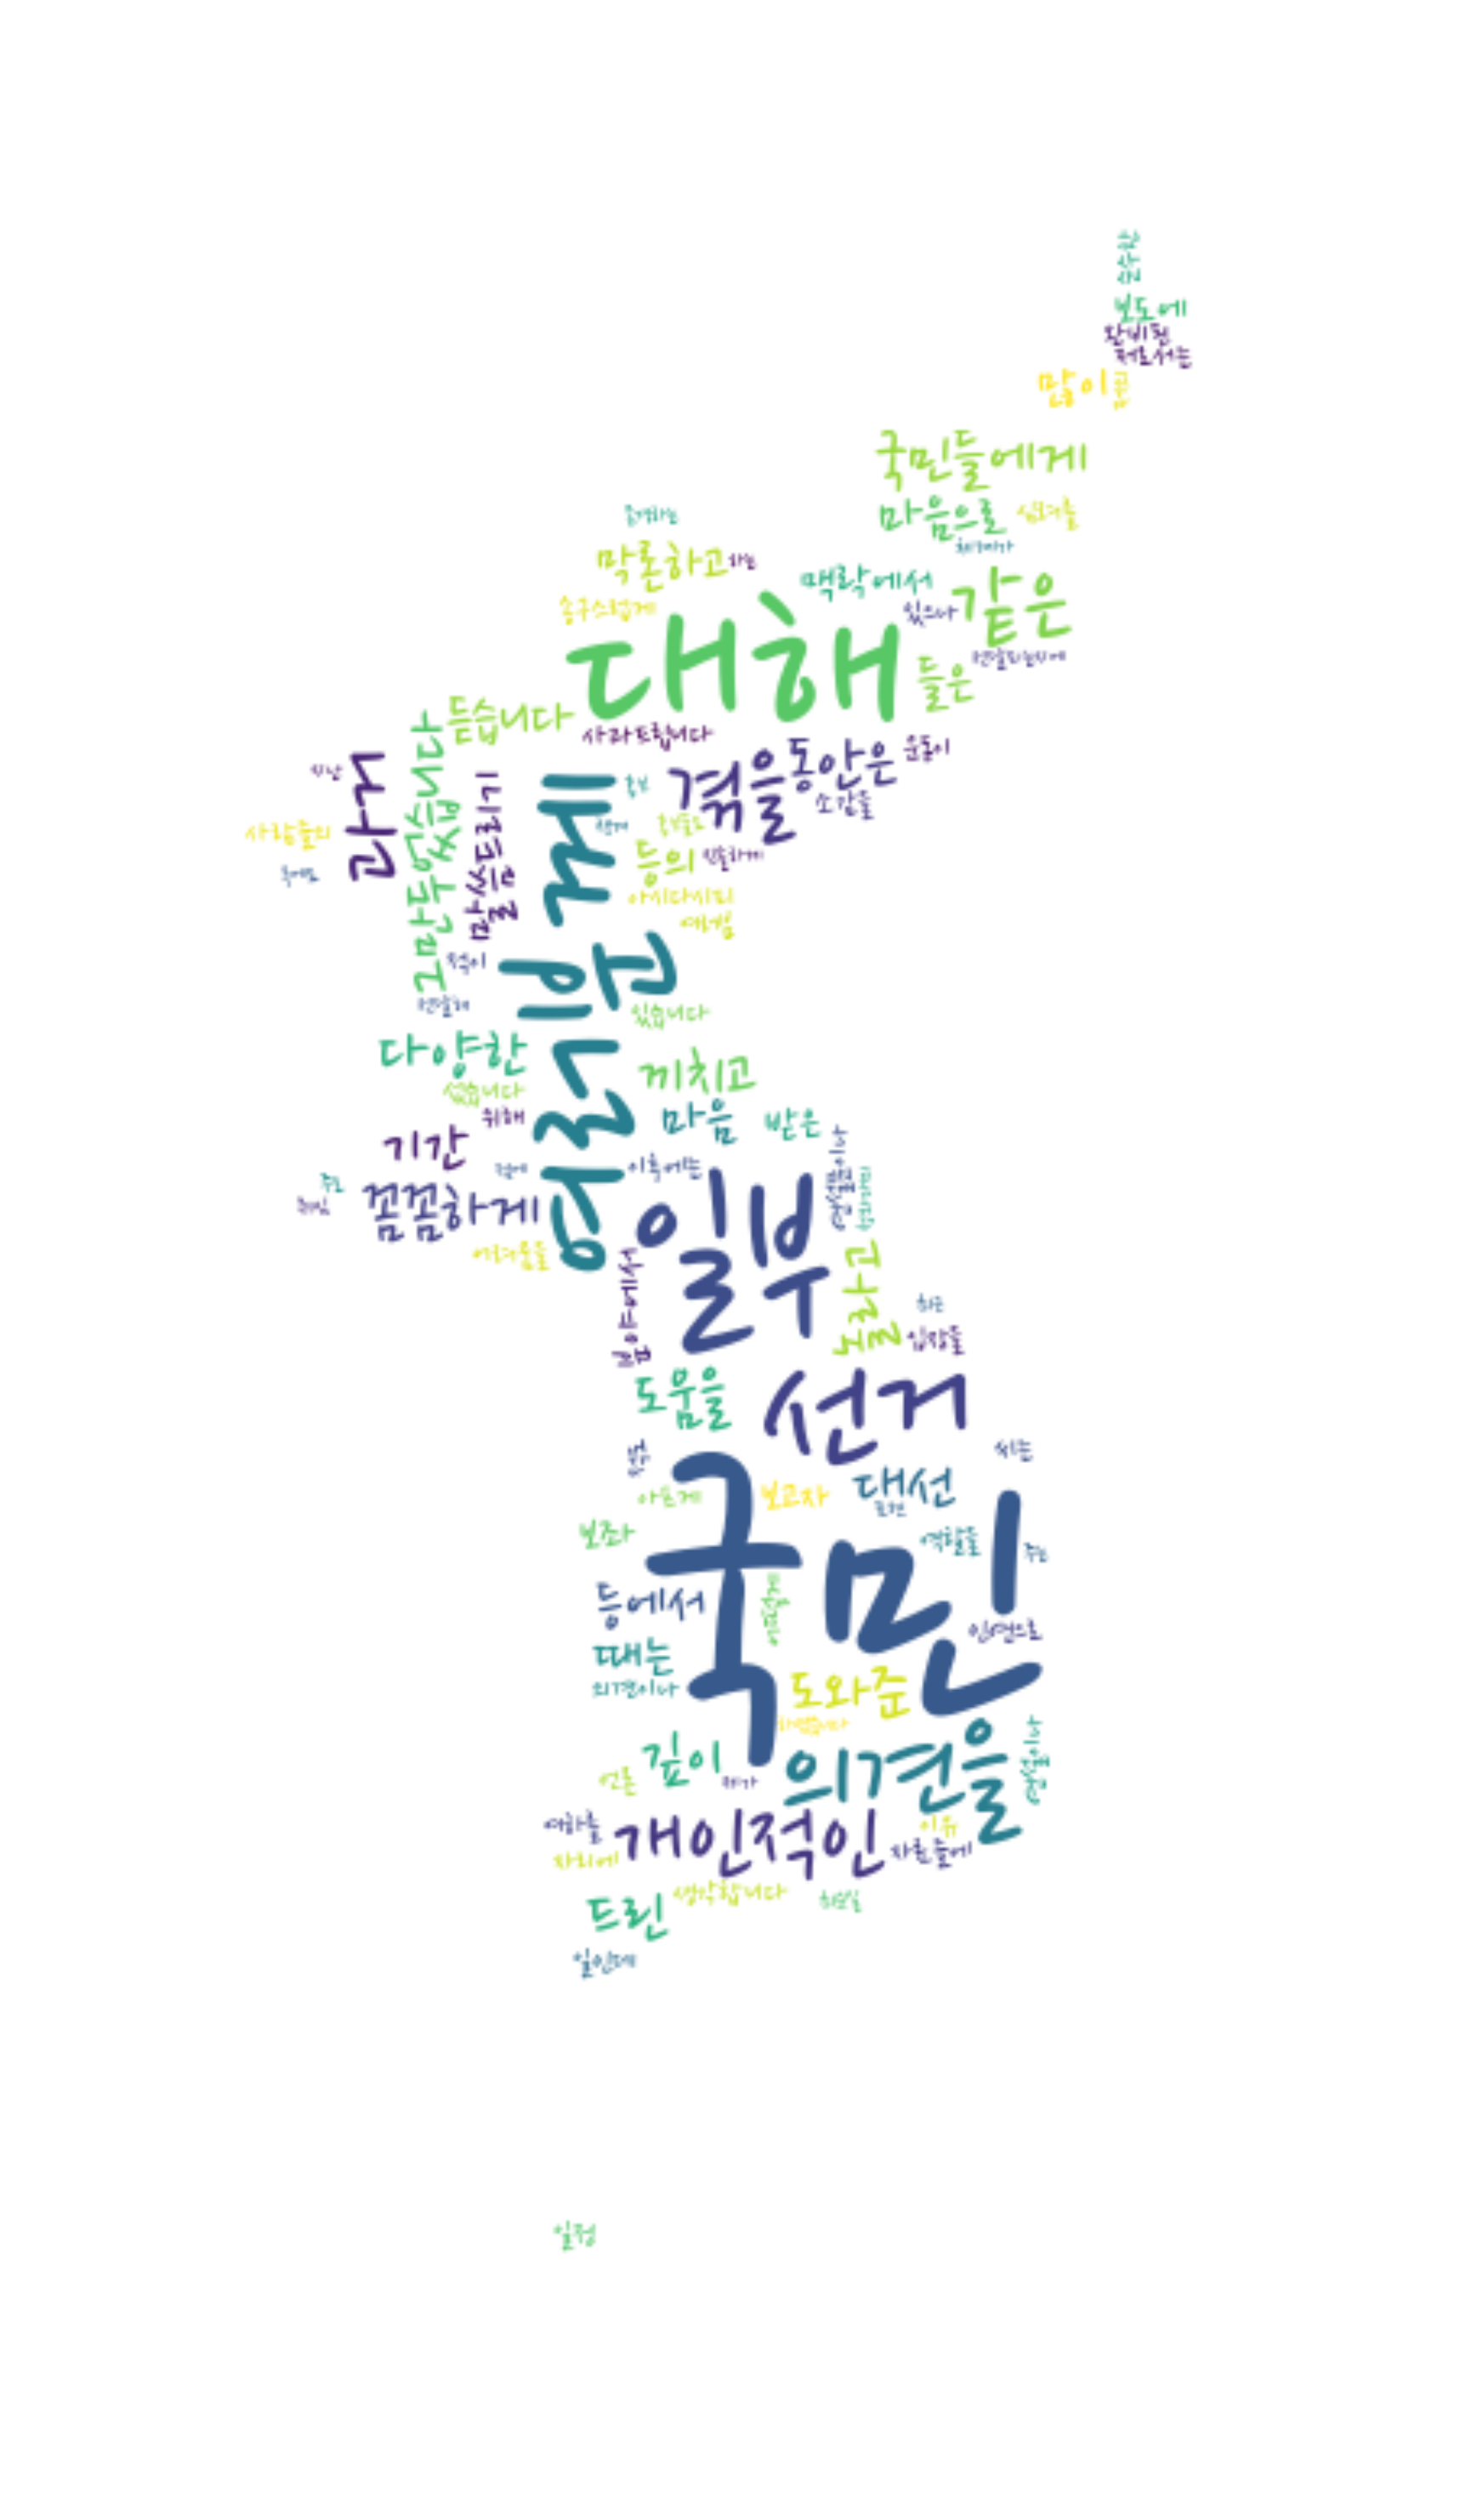

In [26]:
# 연설문 1
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict1)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("MoonSpeech.png") # 그림파일로 추출하기

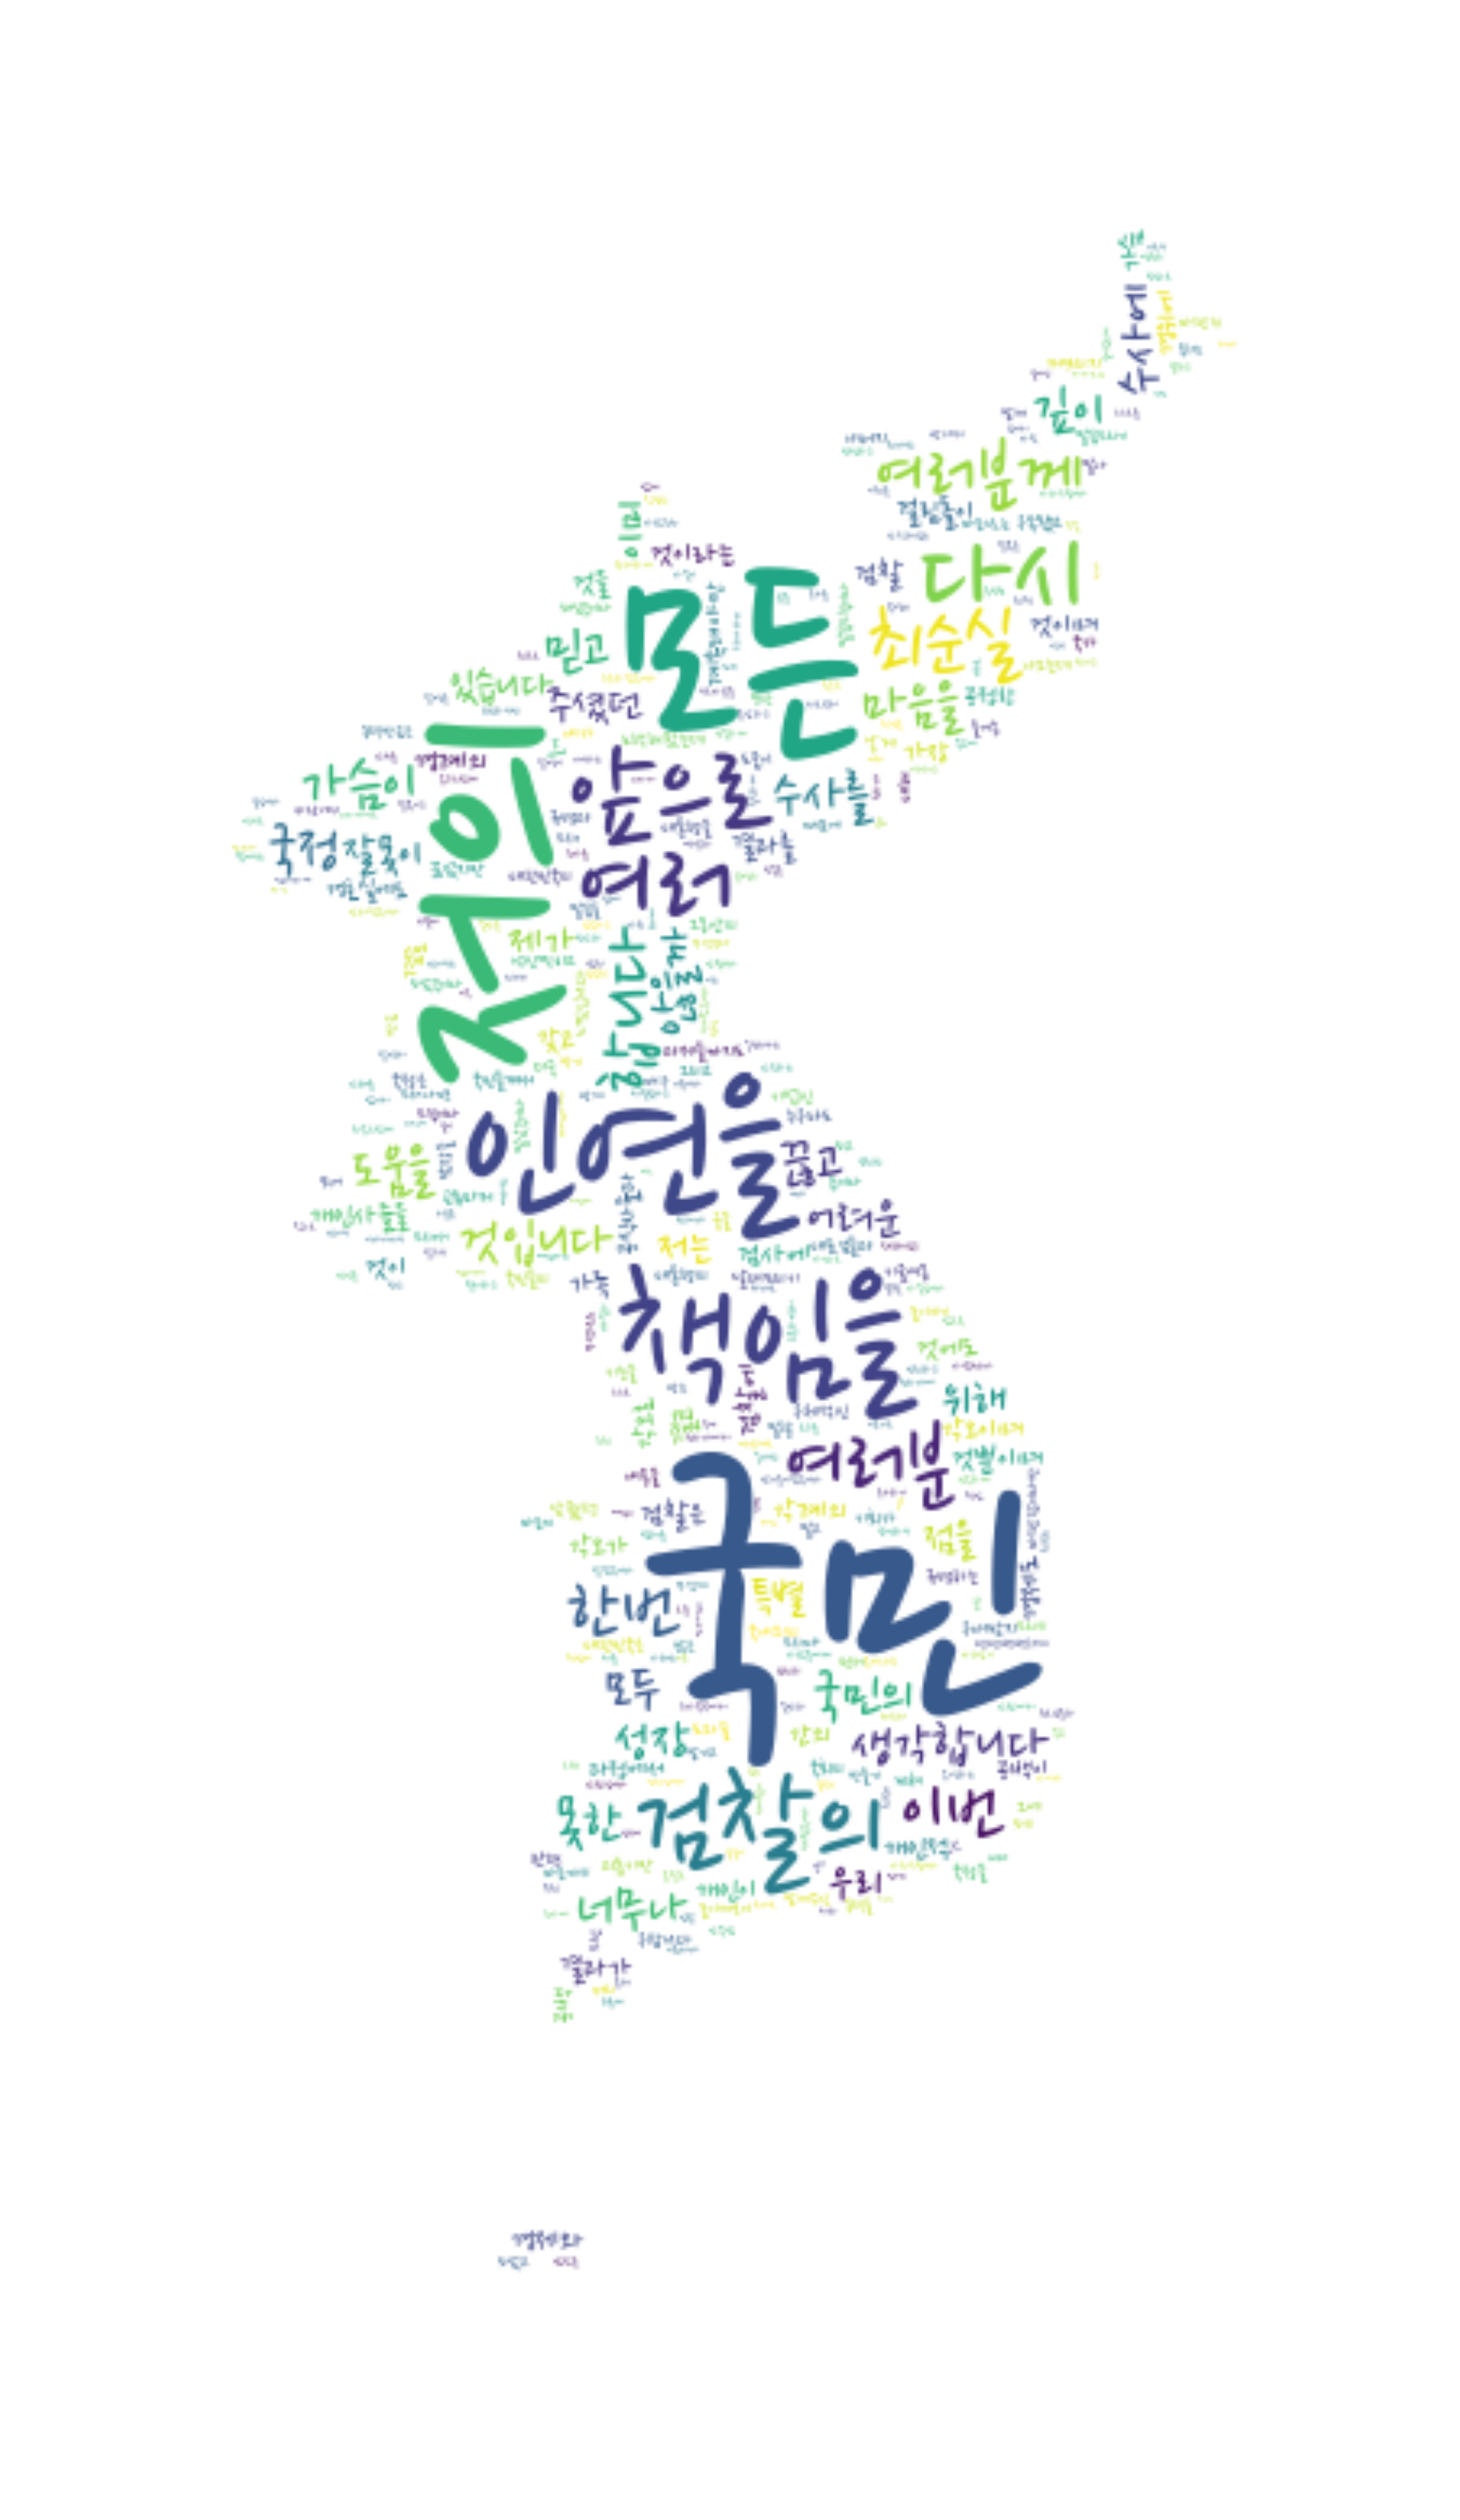

In [27]:
# 연설문 2
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict2)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("KimSpeech.png") # 그림파일로 추출하기

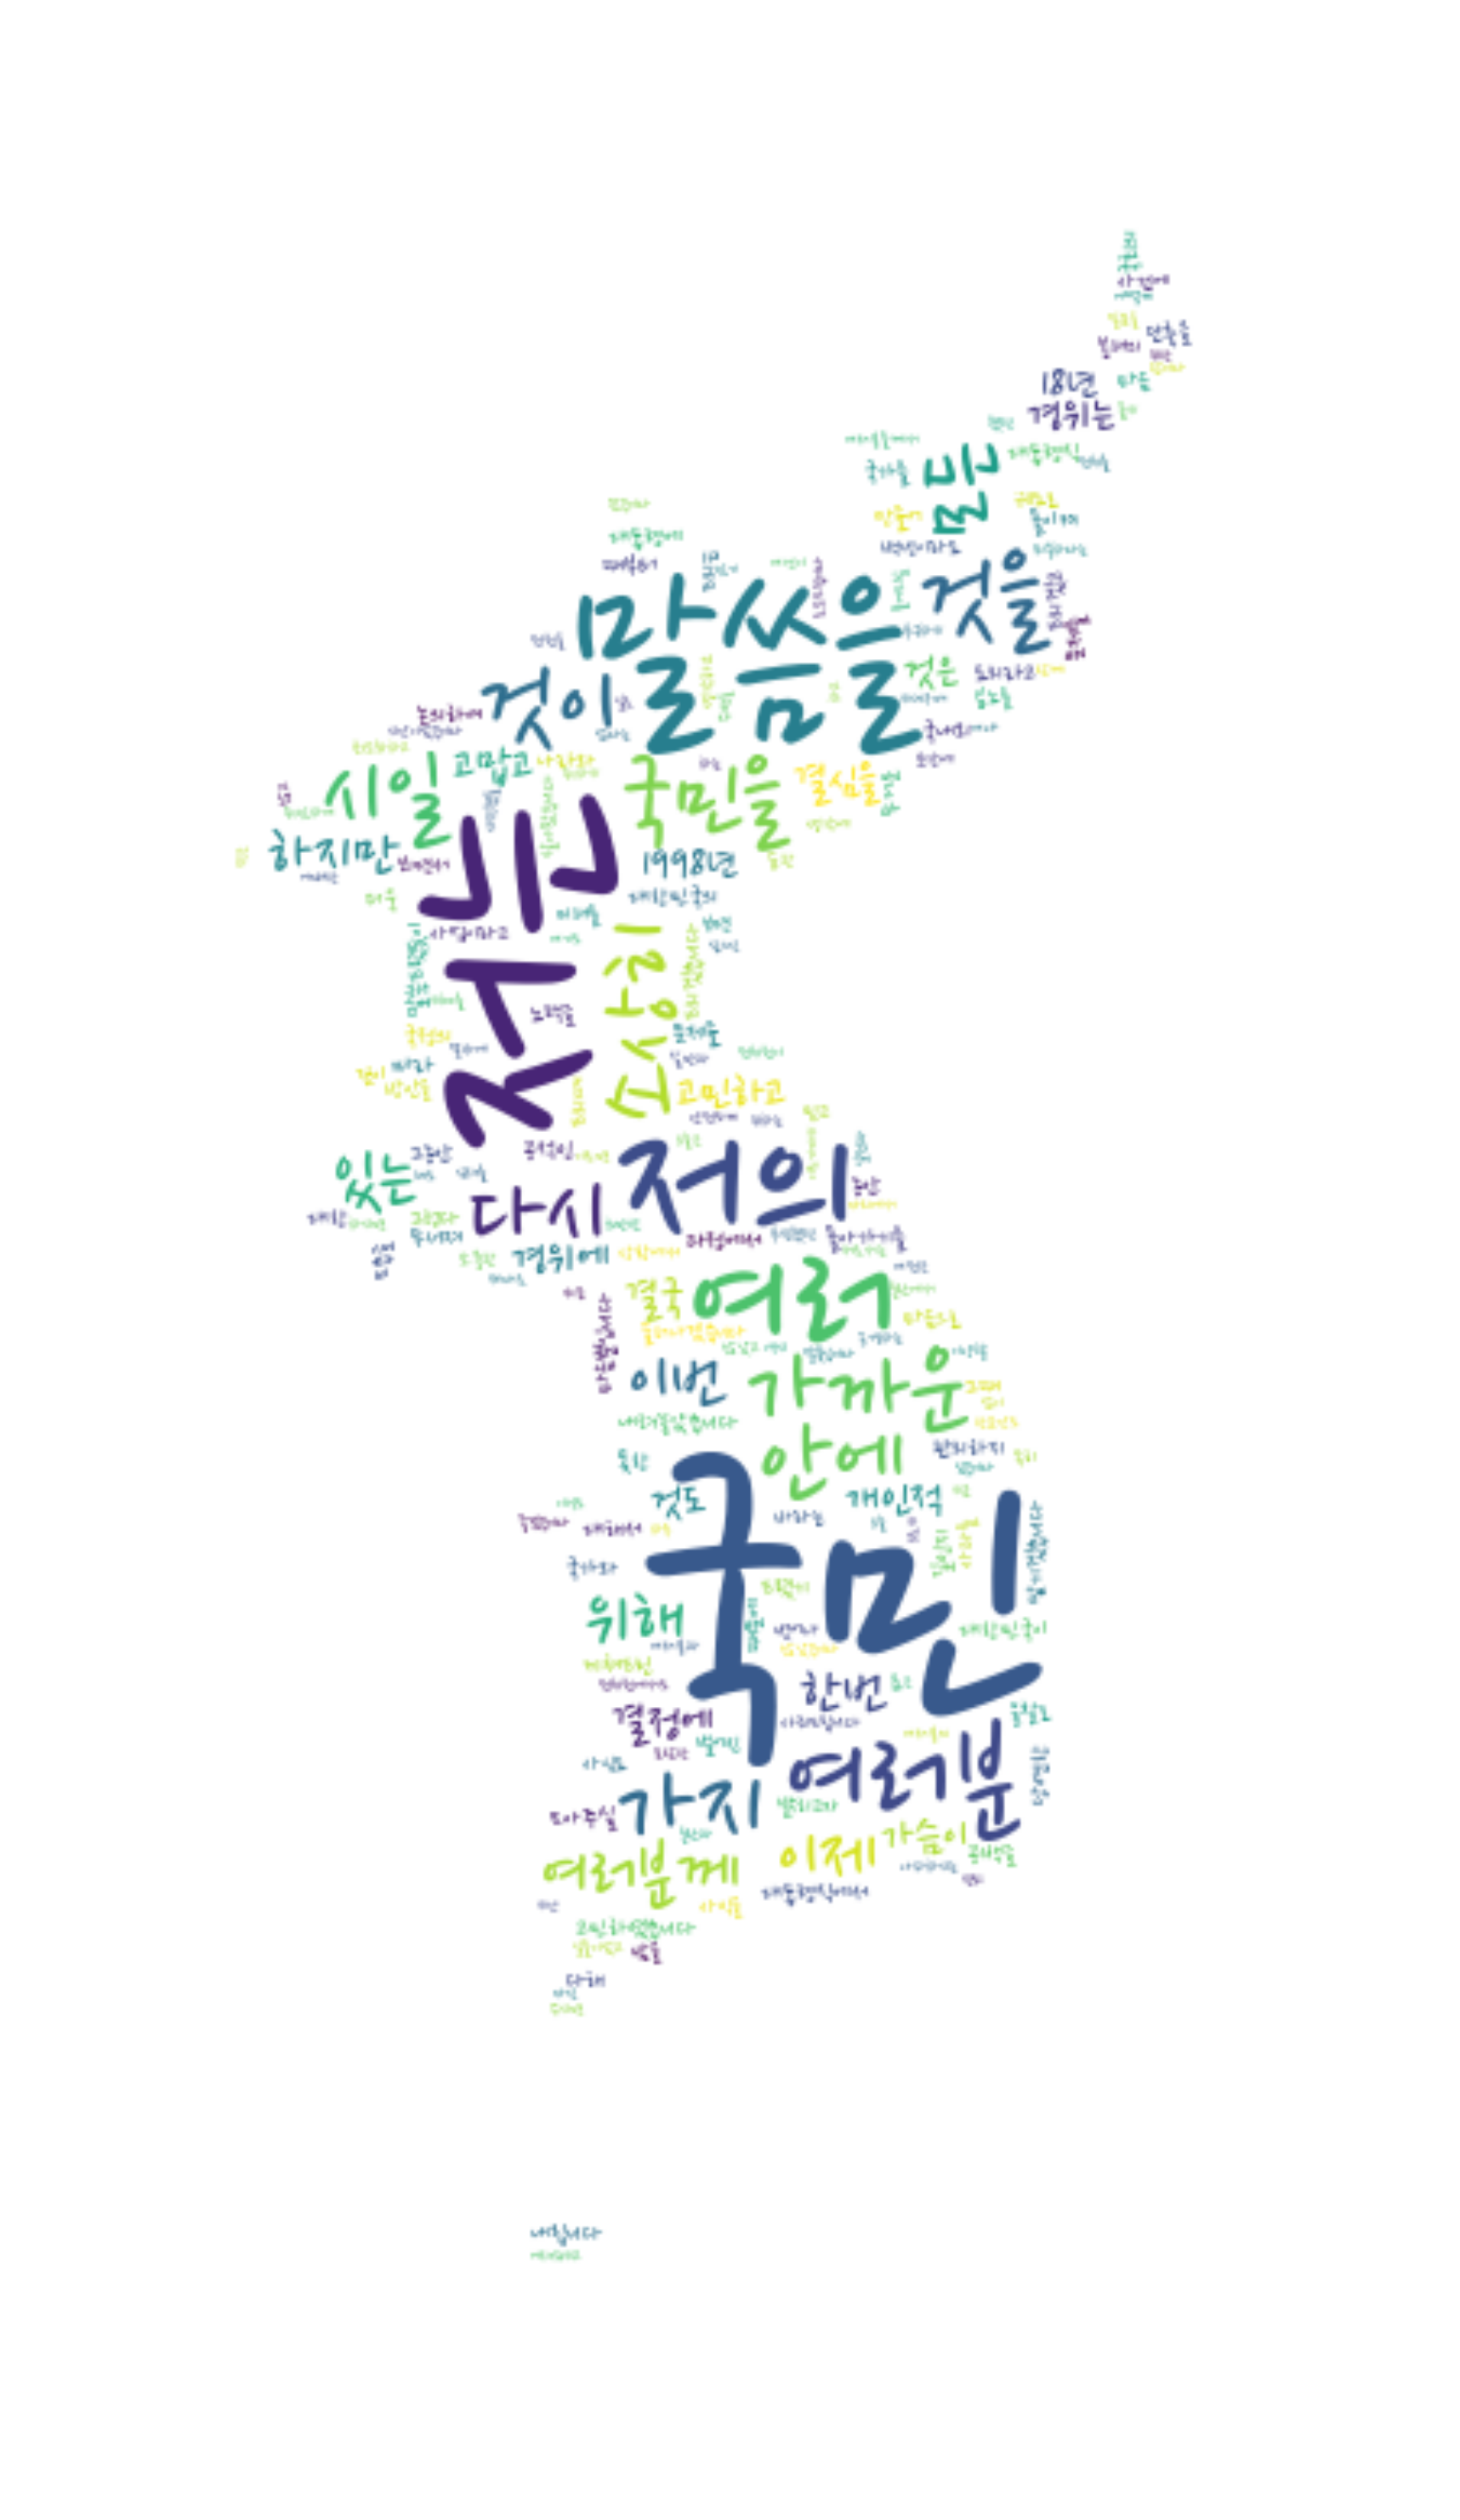

In [28]:
# 연설문 2
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict3)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("KimSpeech.png") # 그림파일로 추출하기